# Basically required Libraries

In [54]:
#Required Libararies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading and Data exploration

In [197]:
df=pd.read_csv(r"C:\Jupyter_Notebook\Auto_MPG/auto-mpg.csv")

In [198]:
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [199]:
df.shape

(398, 9)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [201]:
df.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

In [202]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [203]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [204]:
#Horse power is numeric value but its datatype is object.Hence convert into int64 or float64
df['horsepower']=pd.to_numeric(df['horsepower'], errors = 'coerce')
df.dropna(subset=['horsepower'],inplace=True)

In [205]:
df.shape

(392, 9)

In [206]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [207]:
df['car name'].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

In [208]:
columns_without_car_name=[i for i in df.columns if i != 'car name']
for j in columns_without_car_name:
    print(" The mininum value and maximum value of {} are {} and {}" .format(j, min(df[j]), max(df[j])))

 The mininum value and maximum value of mpg are 9.0 and 46.6
 The mininum value and maximum value of cylinders are 3 and 8
 The mininum value and maximum value of displacement are 68.0 and 455.0
 The mininum value and maximum value of horsepower are 46.0 and 230.0
 The mininum value and maximum value of weight are 1613 and 5140
 The mininum value and maximum value of acceleration are 8.0 and 24.8
 The mininum value and maximum value of model year are 70 and 82
 The mininum value and maximum value of origin are 1 and 3


In [209]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.290316  0.212746  
model year        0.290316    1.000000  0.181528  
origin            0.212746    0.181528  1.000000

<AxesSubplot:>

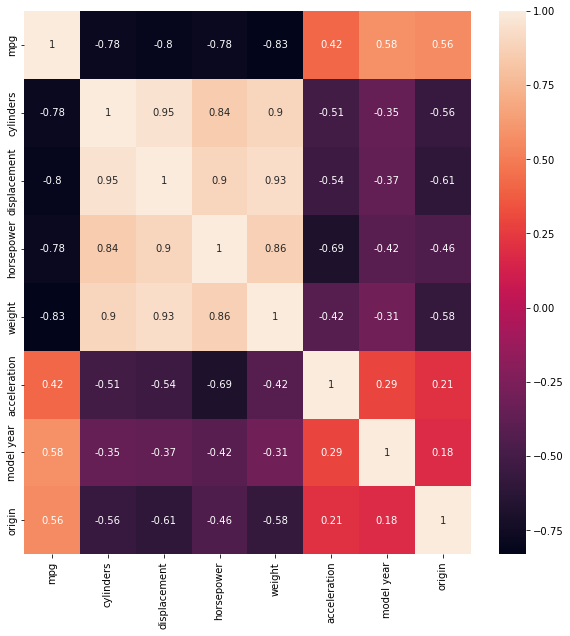

In [184]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

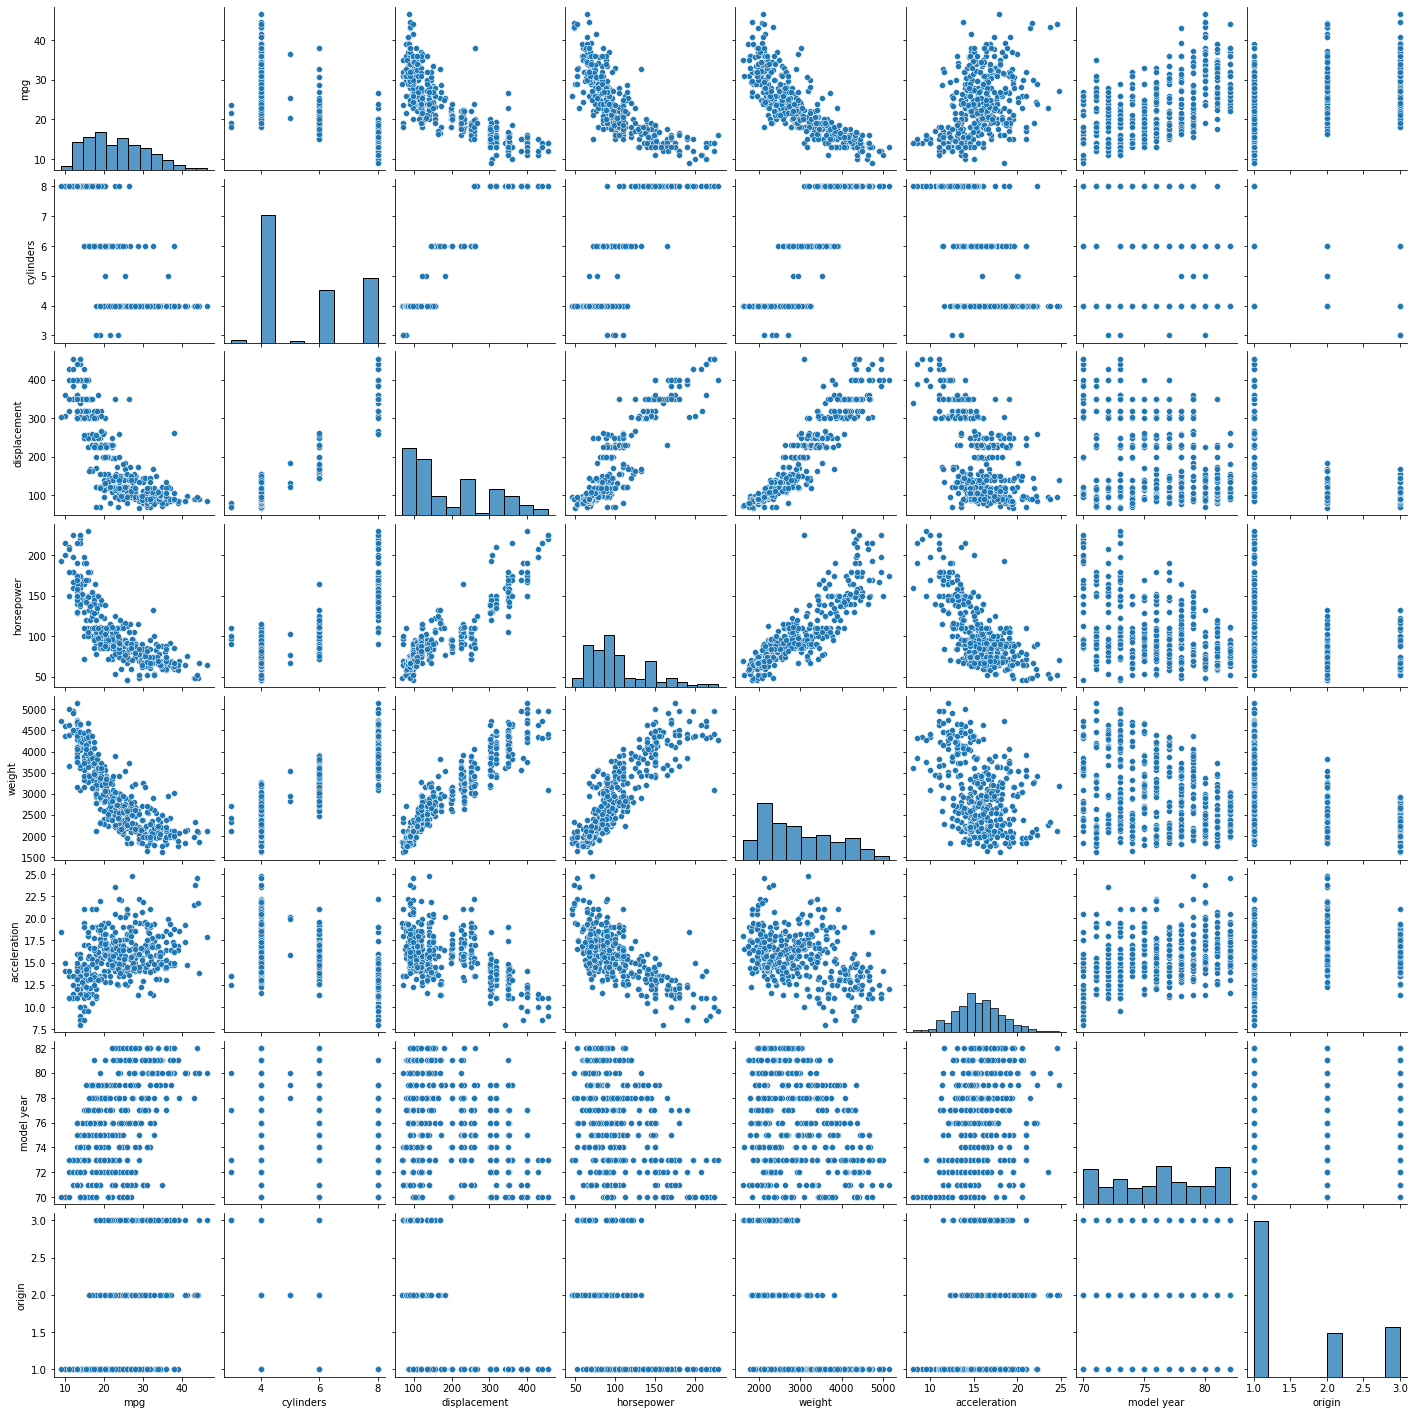

In [185]:
sns.pairplot(df)

In [210]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    ax1.set_title(col)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

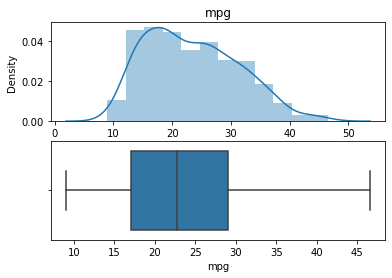

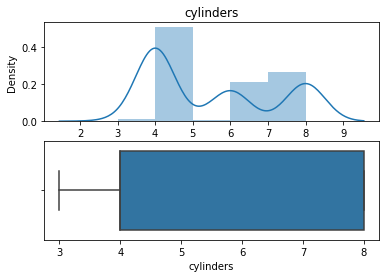

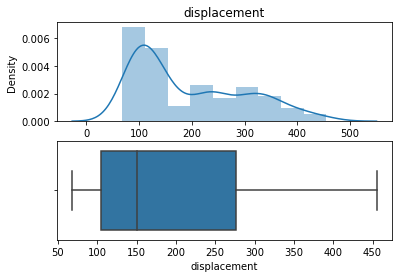

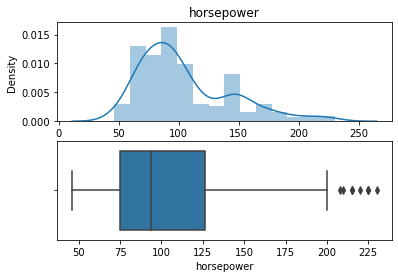

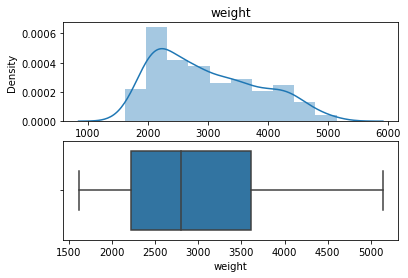

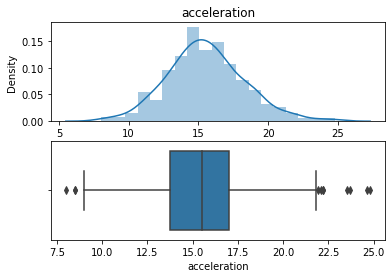

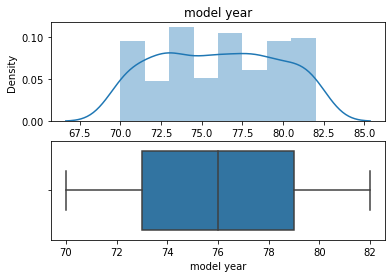

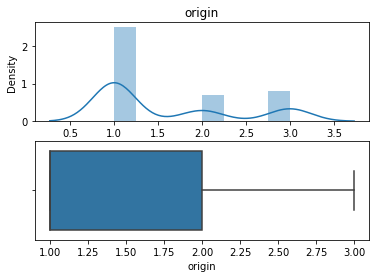

In [211]:
columns_without_car_name=[i for i in df.columns if i != 'car name']
for i in columns_without_car_name:
     plot(df,i)
     

In [212]:
##mpg,horsepower and acceleration has outlier.so lets replace the outliers with median(as they are less prone to outliers when comapared to mean)
df['mpg'] = np.where(df['mpg'] >45, df['mpg'].median(),df['mpg'])
df['horsepower'] = np.where(df['horsepower'] >201, df['horsepower'].median(),df['horsepower'])
df['acceleration'] = np.where((df['acceleration'] >22.5) & (df["acceleration"]<9), df['acceleration'].median(),df['acceleration'])

In [213]:
df.drop('car name',axis=1,inplace=True)

In [214]:
y=df.iloc[:,0]
y.head()
y.shape

(392,)

In [215]:
X=df.iloc[:,1:]
X.head()
X.shape

(392, 7)

# Pandas Profiling Module


This module gives us the detailed exploration of data with just few lines of code.The data exploration can be obtained in 2 formats
1)profile.to_widgets()
2)profile.to_notebook_iframe()

In [10]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [11]:
from pandas_profiling import ProfileReport
#jupyter nbextension enable --py widgetsnbextension

In [216]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [217]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [219]:
X.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [220]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9825676261164571
Predictions are: [16.161  32.297  14.332  23.496  30.118  18.033  26.82   18.143  15.851
 35.452  15.66   21.796  13.93   29.37   15.565  20.403  25.514  12.41
 14.135  15.69   19.749  25.945  27.055  37.406  36.014  14.21   23.922
 34.05   21.769  27.935  19.636  29.427  18.515  20.634  20.047  28.461
 26.044  25.614  23.587  12.49   15.887  20.788  21.08   26.812  19.879
 16.806  26.327  28.842  23.831  19.44   23.406  35.0205 15.715  18.956
 21.702  15.397  12.55   25.515  20.897  31.525  15.682  12.28   25.06
 23.156  17.64   36.772  33.786  20.569  23.405  21.04   22.959  32.768
 26.189  13.269  23.759  31.37   24.755  13.77   20.518 ]


r2 score is: 0.8229585423886685
MAE:2.0613101265822773
MSE:10.665283775316446
RMSE:3.2657746057124712


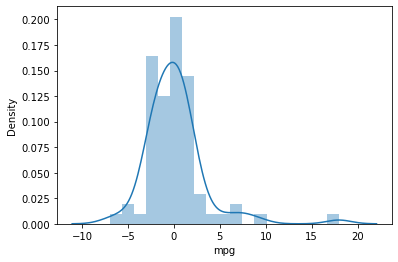

In [222]:
predict(RandomForestRegressor())

Model is: KNeighborsRegressor()
Training score: 0.8162113583242334
Predictions are: [14.5  33.42 14.5  26.86 27.5  19.8  25.8  18.06 14.1  32.5  15.4  21.84
 17.8  29.96 14.1  22.22 27.08 12.4  14.5  15.44 20.26 30.12 26.74 35.46
 33.86 15.5  26.38 31.72 26.32 31.92 19.9  27.7  18.24 25.92 19.7  26.02
 31.98 22.5  26.78 15.18 17.7  19.32 26.18 18.06 26.08 16.42 25.48 28.4
 27.18 19.14 26.68 31.54 14.98 16.82 20.62 14.98 12.8  30.12 21.16 32.92
 14.1  11.6  26.58 25.78 15.5  32.5  29.16 21.36 21.76 20.62 26.08 35.46
 28.2  14.58 23.8  27.18 25.66 14.1  20.02]


r2 score is: 0.683639629092469
MAE:3.1964556962025314
MSE:19.05809620253164
RMSE:4.3655579485939295


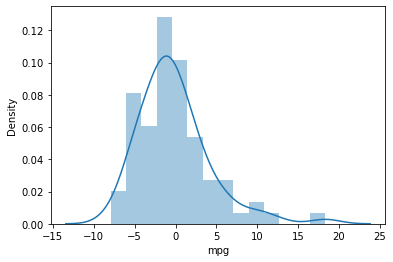

In [224]:
predict(KNeighborsRegressor())

Model is: SVR()
Training score: 0.7068958325130953
Predictions are: [15.24483311 29.57995099 14.83296536 26.5505897  25.50328482 19.00822885
 27.95931499 18.37903499 15.08625061 30.88925834 14.48881212 21.32631264
 16.16902596 29.5283964  15.170752   22.56102753 27.95607355 12.99172222
 15.01792754 17.68735644 22.03855794 28.53626547 25.49056295 31.37750243
 30.1745002  16.36352187 25.68306819 29.07828913 22.93830864 30.97203533
 18.93463886 25.6664269  20.1102453  23.02728499 22.20164665 24.79882468
 29.21301288 24.05199513 26.12042387 13.9590951  16.16056094 19.58007273
 27.14250249 18.43818492 25.21284155 21.39491936 24.62737258 25.38249692
 27.26327388 20.30343026 25.13900737 29.70695333 14.0551649  18.99577498
 19.28559347 13.91750071 13.12996769 28.5262467  23.73521144 30.08067067
 14.42778979 12.99807083 28.47687685 24.49185032 16.36683551 30.92049939
 29.03261453 22.68065546 23.84481918 22.30739412 25.12060348 31.3170654
 28.94066781 13.97268957 24.13265639 26.9731212  22.85468

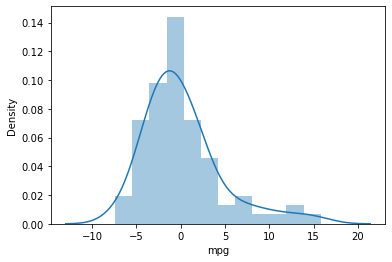

In [225]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.971471928212677
Predictions are: [17.53214183 33.56782957 14.03586717 24.05963388 28.99075012 17.9901426
 28.12039051 18.44983125 17.34262635 36.23482536 15.59015478 22.29627966
 13.78036105 30.1702903  15.37142717 20.75873624 26.46203364 12.7345363
 13.8727946  15.1445565  18.68620286 26.61426506 27.74420884 37.98253591
 35.81368302 14.42504923 24.92936348 33.79013846 22.02239552 29.3380082
 17.39367762 29.12222895 18.26763306 21.38532944 22.96394607 29.67252385
 27.01560938 25.60834082 24.15578415 12.21509162 16.2881926  20.79722315
 21.36089247 25.84794888 21.03758908 18.04512444 27.49875767 29.46724331
 23.98697265 18.46576837 23.42653108 35.1089838  15.93990326 19.01872802
 22.24878558 14.58278962 13.1059186  26.70499695 19.28502624 29.93728843
 15.97938908 12.29008275 25.30463233 24.0853844  18.41573271 37.28547663
 33.98857776 20.43260499 24.25836893 20.18242113 23.62046498 32.71167303
 25.80539461 13.53843365 24.63283862 3

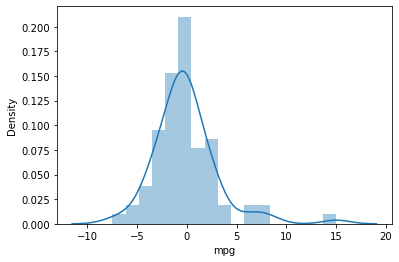

In [226]:
predict(GradientBoostingRegressor())

In [227]:
from sklearn.model_selection import RandomizedSearchCV

In [228]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [229]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 180, 'max_features': 'sqrt', 'max_depth': 15}

In [230]:
# best parameter
rf_random.best_params_

{'n_estimators': 180, 'max_features': 'sqrt', 'max_depth': 15}

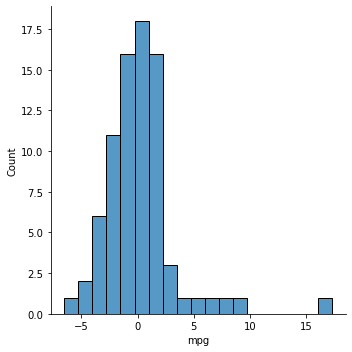

In [231]:
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [232]:
r2_score(y_test,prediction)

0.8243037064025429

Model is: RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=180)
Training score: 0.9830188911016943
Predictions are: [17.02722222 33.04842593 14.30333333 23.51966667 29.10444444 18.20333333
 25.478      18.02444444 16.47055556 34.82111111 15.04731481 21.57388889
 14.13333333 29.77722222 14.97444444 21.14388889 25.01       12.69444444
 14.74555556 15.37833333 19.445      26.21944444 27.155      37.32027778
 35.68132716 13.57777778 24.85888889 33.50610185 22.17611111 29.19240741
 19.39944444 28.98277778 18.48444444 21.52722222 20.44611111 28.74255556
 26.79527778 25.71111111 23.55333333 12.85833333 15.75388889 20.23805556
 22.48611111 25.92788889 20.84       15.95       25.70444444 27.96333333
 23.435      19.24166667 24.7287037  35.20388889 14.89888889 18.43111111
 21.73888889 14.19805556 13.08928571 25.70944444 21.05944444 31.20583333
 15.04666667 12.70555556 25.24592593 23.80277778 17.41277778 36.55361111
 33.70388889 20.61333333 23.64611111 20.68122222 23.51833333

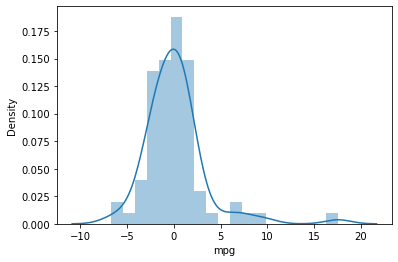

In [245]:
predict(RandomForestRegressor(n_estimators=180, max_features= "sqrt", max_depth= 15))

In [247]:
 
    print('Model is: {}'.format(RandomForestRegressor))
    model= RandomForestRegressor(n_estimators=180, max_features= "sqrt", max_depth= 15).fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

Model is: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Training score: 0.9830178037933792
Predictions are: [17.10777778 33.00694444 14.35       23.34796296 29.74111111 18.27826797
 25.84585185 18.17079365 16.41111111 35.27833333 15.35944444 21.75555556
 14.05555556 29.35       15.16611111 21.10277778 25.41296296 12.71111111
 14.61444444 15.18166667 19.39743464 25.95388889 27.55722222 37.59305556
 35.22361111 13.78611111 24.26888889 33.72457407 22.21111111 28.95888889
 19.505      28.585      18.48953782 20.95888889 20.23555556 29.19611111
 26.56444444 25.855      23.37462963 12.73166667 16.24333333 20.3475
 22.44777778 26.05666667 20.41222222 16.395      26.33388889 28.19444444
 23.57333333 19.20216667 24.41777778 34.48833333 15.15611111 18.63055556
 21.52       14.475      12.93333333 26.00555556 20.63833333 31.34416667
 15.18444444 12.78888889 25.15777778 23.35148148 17.64944444 36.20416667
 33.58094444 20.71037037 22.85472222 20.56518519 23.345      32.40444444
 26.85555

In [251]:
model_file = open('autorf.pkl','wb')
pickle.dump(model, model_file)
model_file.close()

In [252]:
model_file = open('autorf.pkl', 'rb')
rf_model = pickle.load(model_file)
model_file.close()
print(rf_model)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=180)
